<a href="https://colab.research.google.com/github/donohueDev/ML-Music-Genre-Prediction/blob/main/CS471_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns


In [ ]:
# link to download dataset to your drive:
# https://www.kaggle.com/datasets/vicsuperman/prediction-of-music-genre

In [ ]:
# mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# reading data from file to variable named data
data = pd.read_csv('/content/drive/MyDrive/music_genre.csv')
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Analysis & Cleaning

In [ ]:
# displaying first few rows
data.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
 # descriptive statistics for data
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [ ]:
# check data types/nulls
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [ ]:
# print columns which have null data
print(data[data.isnull().all(axis=1)])

Empty DataFrame
Columns: [popularity, acousticness, danceability, duration_ms, energy, instrumentalness, key, liveness, loudness, mode, speechiness, tempo, valence, music_genre]
Index: []


In [ ]:
# remove null data and check for results
data.dropna(how='all', inplace=True)
print(data.isnull().sum())


In [ ]:
# drop unnecessary columns
data1 = data.copy()
data1 = data1.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date' ])
print(data1.describe())

In [ ]:
# handle missing/invalid content
data1 = data1[data1['duration_ms'] > 0]
data1 = data1.dropna()

In [ ]:
# Check which columns contain '?'
for col in data1.columns:
    if data1[col].astype(str).str.contains(r'\?').any():
        print(f"Column with '?': {col}")
# print amount of columns with ?
print(data1.columns[data1.eq('?').any()].tolist())
data1.replace('?', pd.NA, inplace=True)
data1.dropna(inplace=True)

# converting ms to seconds
data1['duration_ms'] = data1['duration_ms'] / 60000
# seperate features and labels
X = data1.drop(columns=['music_genre'])
y = data1['music_genre']
feature_names = X.columns  # Save column names here
# Encode genre before train-test split
genre_encoder = LabelEncoder()
data1['music_genre'] = genre_encoder.fit_transform(data1['music_genre'])

# print data count in each genre
print(data1['music_genre'].value_counts())

# print sum of genre counts:
print(data1['music_genre'].value_counts().sum())

#print toal amount of data after removing bad data
print(data1.describe())

print(genre_encoder.classes_)

In [ ]:
# Train/validation/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
# encode categorical columns: 'key', 'mode'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Total samples:", len(X_train) + len(X_test))

# RANDOM FOREST CLASSIFIER - before merging genres

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Initialize the model
# rf = RandomForestClassifier(random_state=42)

# # Set up GridSearchCV
# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     verbose=2
# )

# # Run grid search
# grid_search.fit(X_train, y_train)

# Best parameters and accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Accuracy:", grid_search.best_score_)
# Best Parameters: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
# Train the model
rf = RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# # Convert encoded labels back to original genre names
# y_train_genres = genre_encoder.inverse_transform(y_train)
# y_train_pred_genres = genre_encoder.inverse_transform(y_train_pred)

# y_test_genres = genre_encoder.inverse_transform(y_test)
# y_test_pred_genres = genre_encoder.inverse_transform(y_test_pred)

# === Training Set Evaluation ===
print("=== Training Set Classification Report post merge ===")
print(classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_))

print("\n=== Training Set Confusion Matrix post merge ===")
train_cm = confusion_matrix(y_train, y_train_pred, labels=genre_encoder.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=genre_encoder.classes_)
train_disp.plot(xticks_rotation=45)
train_disp.ax_.set_title("Random Forest Confusion Matrix pre merge (Train)")
plt.show()

# === Testing Set Evaluation ===
print("\n=== Testing Set Classification Report pre merge ===")
print(classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_))

print("\n=== Testing Set Confusion Matrix pre merge ===")
test_cm = confusion_matrix(y_test, y_test_pred, labels=genre_encoder.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=genre_encoder.classes_)
test_disp.plot(xticks_rotation=45)
test_disp.ax_.set_title("Random Forest Confusion Matrix pre merge (Test)")
plt.show()


# view sample predictions
comparison_df = pd.DataFrame({
    'True Genre': y_test,
    'Predicted Genre': y_pred
})
print(comparison_df.head())


# merging genres in attempt to increase model performance

In [ ]:
# copy dataset
data2 = data1.copy()

# inverse old encoding
data2['music_genre'] = genre_encoder.inverse_transform(data2['music_genre'])

# merge genres
data2['music_genre'] = data2['music_genre'].replace({
    'Rap': 'Hip-Hop',
    'Alternative': 'Rock',
    'Blues': 'Jazz',
})

# Re-encode genres to ensure labels are sequential
genre_encoder = LabelEncoder()
data2['music_genre'] = genre_encoder.fit_transform(data2['music_genre'])

X = data2.drop(columns=['music_genre'])
y = data2['music_genre']

print(data2['music_genre'].value_counts())
# make sure amount stayed the same of total
print(data2['music_genre'].value_counts().sum())
print(genre_encoder.classes_)


# RANDOM FOREST CLASSIFIER V2

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train/validation/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# encode categorical columns: 'key', 'mode', 'music_genre'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])


rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on both train and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Convert encoded labels back to original genre names
y_train_genres = genre_encoder.inverse_transform(y_train)
y_train_pred_genres = genre_encoder.inverse_transform(y_train_pred)

y_test_genres = genre_encoder.inverse_transform(y_test)
y_test_pred_genres = genre_encoder.inverse_transform(y_test_pred)

# === Training Set Evaluation ===
print("=== Training Set Classification Report post merge ===")
print(classification_report(y_train_genres, y_train_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Training Set Confusion Matrix post merge ===")
train_cm = confusion_matrix(y_train_genres, y_train_pred_genres, labels=genre_encoder.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=genre_encoder.classes_)
train_disp.plot(xticks_rotation=45)
train_disp.ax_.set_title("Random Forest Confusion Matrix post merge (Train)")
plt.show()

# === Testing Set Evaluation ===
print("\n=== Testing Set Classification Report post merge ===")
print(classification_report(y_test_genres, y_test_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Testing Set Confusion Matrix post merge ===")
test_cm = confusion_matrix(y_test_genres, y_test_pred_genres, labels=genre_encoder.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=genre_encoder.classes_)
test_disp.plot(xticks_rotation=45)
test_disp.ax_.set_title("Random Forest Confusion Matrix post merge (Test)")
plt.show()



In [ ]:
# # Set up GridSearchCV
# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='precision_weighted',
#     verbose=2
# )

# # Run grid search
# grid_search.fit(X_train, y_train)

# # Best parameters and accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Accuracy:", grid_search.best_score_)

In [ ]:
# Using tuned hyperparameters
# Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
rf = RandomForestClassifier(max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=200, random_state=42)

# rf = RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], min_samples_leaf= grid_search.best_params_['min_samples_leaf'], min_samples_split= grid_search.best_params_['min_samples_split'], n_estimators= grid_search.best_params_['n_estimators'], random_state=42)

rf.fit(X_train, y_train)

# Predict on training and test sets
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# === Training Set Evaluation ===
print("=== Training Set Classification Report w/ tuning ===")
print(classification_report(y_train_genres, y_train_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Training Set Confusion Matrix w/ tuning ===")
train_cm = confusion_matrix(y_train_genres, y_train_pred_genres, labels=genre_encoder.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=genre_encoder.classes_)
train_disp.plot(xticks_rotation=45)
train_disp.ax_.set_title("Random Forest Confusion Matrix w/ tuning (Train)")
plt.show()

# === Testing Set Evaluation ===
print("\n=== Testing Set Classification Report w/ tuning ===")
print(classification_report(y_test_genres, y_test_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Testing Set Confusion Matrix w/ tuning ===")
test_cm = confusion_matrix(y_test_genres, y_test_pred_genres, labels=genre_encoder.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=genre_encoder.classes_)
test_disp.plot(xticks_rotation=45)
test_disp.ax_.set_title("Random Forest Confusion Matrix w/ tuning (Test)")
plt.show()

In [ ]:
from sklearn.inspection import permutation_importance

# Compute permutation importances
result = permutation_importance(
    rf,                  # your trained model
    X_test,         # features from the test set
    y_test,                 # true labels
    n_repeats=10,           # number of repeats to get stable importance
    random_state=42,
    scoring='accuracy'      # or another metric like 'f1_macro'
)

# Convert to a pandas DataFrame for easier plotting
perm_df = pd.DataFrame({
    'Feature': X_test.columns,
    'Importance': result.importances_mean,
    'Std': result.importances_std
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(perm_df['Feature'], perm_df['Importance'], xerr=perm_df['Std'], color='skyblue')
plt.xlabel('Mean Decrease in Accuracy')
plt.title('Permutation Feature Importance')
plt.gca().invert_yaxis()  # Highest importance at the top
plt.tight_layout()
plt.show()


In [ ]:
# from sklearn.inspection import permutation_importance
# testing dropping low importance features - actually made the model perform worse
low_importance_features = ['key', 'mode', 'liveness', 'tempo']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

# Set up GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2],
# }

# grid_search = GridSearchCV(
#     estimator=rf,
#     param_grid=param_grid,
#     cv=5,  # 5-fold cross-validation
#     scoring='accuracy',
#     verbose=2
# )

# # Run grid search
# grid_search.fit(X_train_reduced, y_train)

# # Best parameters and accuracy
# print("Best Parameters:", grid_search.best_params_)
# print("Best CV Accuracy:", grid_search.best_score_)

# Best Parameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
model = RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=200, random_state=42)
# model = RandomForestClassifier(max_depth= grid_search.best_params_['max_depth'], min_samples_leaf= grid_search.best_params_['min_samples_leaf'], min_samples_split= grid_search.best_params_['min_samples_split'], n_estimators= grid_search.best_params_['n_estimators'], random_state=42)
model.fit(X_train_reduced, y_train)

# Evaluate the model
y_pred = model.predict(X_test_reduced)


# === Training Set Evaluation ===
print("=== Training Set Classification Report w/ feature removal ===")
print(classification_report(y_train_genres, y_train_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Training Set Confusion Matrix w/ feature removal ===")
train_cm = confusion_matrix(y_train_genres, y_train_pred_genres, labels=genre_encoder.classes_)
train_disp = ConfusionMatrixDisplay(confusion_matrix=train_cm, display_labels=genre_encoder.classes_)
train_disp.plot(xticks_rotation=45)
train_disp.ax_.set_title("Random Forest Confusion Matrix w/ feature removal (Train)")
plt.show()

# === Testing Set Evaluation ===
print("\n=== Testing Set Classification Report w/ feature removal===")
print(classification_report(y_test_genres, y_test_pred_genres, target_names=genre_encoder.classes_))

print("\n=== Testing Set Confusion Matrix w/ feature removal===")
test_cm = confusion_matrix(y_test_genres, y_test_pred_genres, labels=genre_encoder.classes_)
test_disp = ConfusionMatrixDisplay(confusion_matrix=test_cm, display_labels=genre_encoder.classes_)
test_disp.plot(xticks_rotation=45)
test_disp.ax_.set_title("Random Forest Confusion Matrix w/ feature removal (Test)")
plt.show()


XGBOOST Classifier

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import ConfusionMatrixDisplay
# xgb = XGBClassifier(
#     n_estimators=100,
#     learning_rate=0.1,
#     max_depth=6,
#     random_state=42,
#     use_label_encoder=False,
#     eval_metric='mlogloss'
# )

# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# # classification report
# print(classification_report(y_test, y_pred, target_names=genre_encoder.inverse_transform(sorted(y_test.unique()))))

# # Compute the confusion matrix
# cm = confusion_matrix(y_test_genres, y_pred_genres, labels=genre_encoder.classes_)

# # Display it
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_encoder.classes_)
# disp.plot(xticks_rotation=45)


**Nearest Neighbors - Data Cleaning**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns

#Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

#Reading data from file to variable named data
data = pd.read_csv('/content/drive/MyDrive/music_genre.csv')
from google.colab import drive
drive.mount('/content/drive')

#Displaying first few rows
data.head()

#Descriptive statistics for data
data.describe()

#Check data types/nulls
data.info()

#Print columns which have null data
print(data[data.isnull().all(axis=1)])

#Remove null data and check for results
data.dropna(how='all', inplace=True)
print(data.isnull().sum())

#Drop unnecessary columns
data1 = data.copy()
data1 = data1.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date' ])
print(data1.describe())

#Handle missing/invalid content
data1 = data1[data1['duration_ms'] > 0]
data1 = data1.dropna()

#Check which columns contain '?'
for col in data1.columns:
    if data1[col].astype(str).str.contains(r'\?').any():
        print(f"Column with '?': {col}")

data1.replace('?', pd.NA, inplace=True)
data1.dropna(inplace=True)

#Converting ms to seconds
data1['duration_ms'] = data1['duration_ms'] / 60000
#Seperate features and labels
X = data1.drop(columns=['music_genre'])
y = data1['music_genre']
feature_names = X.columns  #Saving column names here
#Encode genre before train-test split
genre_encoder = LabelEncoder()
data1['music_genre'] = genre_encoder.fit_transform(data1['music_genre'])

#Print data count in each genre
print(data1['music_genre'].value_counts())

#Print sum of genre counts:
print(data1['music_genre'].value_counts().sum())

#Print toal amount of data after removing bad data
print(data1.describe())

print(genre_encoder.classes_)

#Train/validation/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Encode categorical columns: 'key', 'mode'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Total samples:", len(X_train) + len(X_test))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness         

**Nearest Neighbor - Pre-genre merging**

Accuracy: 0.6437
Weighted Precision: 0.6514
Macro Precision: 0.6515


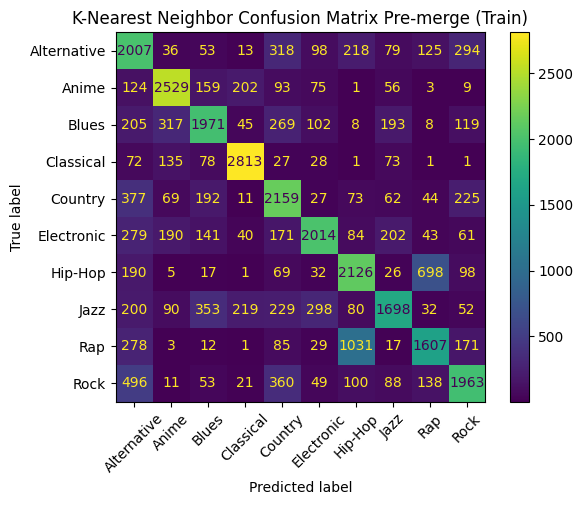

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Initializing and training KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Training prediction and metrics
y_train_pred = knn.predict(X_train_scaled)
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted')
train_precision_macro = precision_score(y_train, y_train_pred, average='macro')

#Evaluating metrics
print(f"Accuracy: {train_accuracy:.4f}")
print(f"Weighted Precision: {train_precision:.4f}")
print(f"Macro Precision: {train_precision_macro:.4f}")

#=====TRAINING MATRIX=====
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=genre_encoder.classes_)
disp_train.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Pre-merge (Train)")
plt.show()

Accuracy: 0.4795
Weighted Precision: 0.4860
Macro Precision: 0.4861


Text(0.5, 1.0, 'K-Nearest Neighbor Confusion Matrix Pre-merge (Test)')

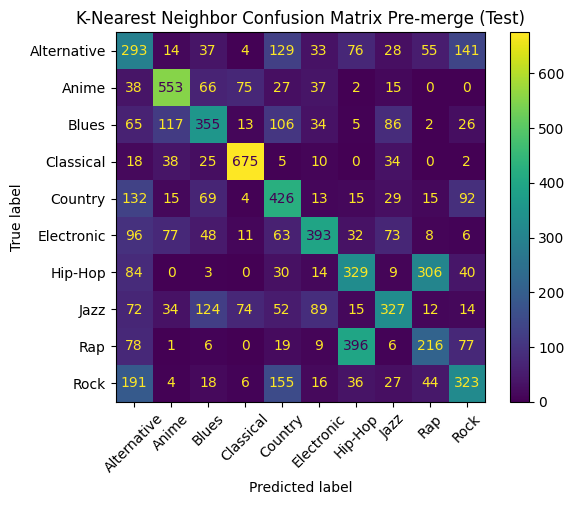

In [ ]:
#Making predictions
y_pred = knn.predict(X_test_scaled)

#Evaluating metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Weighted Precision: {precision:.4f}")
precisionmacro = precision_score(y_test, y_pred, average='macro')
print(f"Macro Precision: {precisionmacro:.4f}")

#Generating and displaying confusion matrix
#=====TESTING MATRIX=====
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Pre-merge (Test)")

In [ ]:
#Copying the dataset
data2 = data1.copy()

#Inversing old encoding
data2['music_genre'] = genre_encoder.inverse_transform(data2['music_genre'])

#Merging genres for better accuracy
data2['music_genre'] = data2['music_genre'].replace({
    'Rap': 'Hip-Hop',
    'Alternative': 'Rock',
    'Blues': 'Jazz',
})

#Re-encoding genres to ensure labels are sequential
genre_encoder = LabelEncoder()
data2['music_genre'] = genre_encoder.fit_transform(data2['music_genre'])

X = data2.drop(columns=['music_genre'])
y = data2['music_genre']

print(data2['music_genre'].value_counts())
#Ensuring amount stayed the same of total
print(data2['music_genre'].value_counts().sum())
print(genre_encoder.classes_)


music_genre
6    8150
4    8119
5    8110
0    4064
2    4049
1    4036
3    4032
Name: count, dtype: int64
40560
['Anime' 'Classical' 'Country' 'Electronic' 'Hip-Hop' 'Jazz' 'Rock']


**Nearest Neighbor - Post-genre merging`**


Training Classification Report (Post-Merge):
              precision    recall  f1-score   support

       Anime       0.75      0.77      0.76      3251
   Classical       0.84      0.87      0.86      3229
     Country       0.57      0.68      0.62      3239
  Electronic       0.72      0.64      0.68      3226
     Hip-Hop       0.81      0.88      0.85      6495
        Jazz       0.75      0.67      0.71      6488
        Rock       0.72      0.68      0.70      6520

    accuracy                           0.74     32448
   macro avg       0.74      0.74      0.74     32448
weighted avg       0.74      0.74      0.74     32448



<Figure size 1000x1000 with 0 Axes>

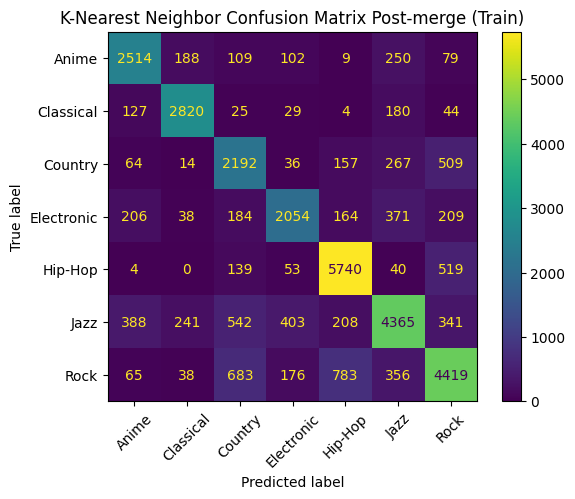

In [ ]:
#Resplitting data after genre merging
X_train_post, X_test_post, y_train_post, y_test_post = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Re-encoding categorical features and scale
for col in ['key', 'mode']:
    X_train_post[col] = col_encoder.fit_transform(X_train_post[col])
    X_test_post[col] = col_encoder.transform(X_test_post[col])

Scaler = StandardScaler()
X_train_post_scaled = Scaler.fit_transform(X_train_post)
X_test_post_scaled = Scaler.transform(X_test_post)

#Retraining KNN but for merged genres this time
knn_post = KNeighborsClassifier(n_neighbors=5)
knn_post.fit(X_train_post_scaled, y_train_post)

#Gnerating confusion matrix
#=====TRAINING MATRIX=====
y_train_post_pred = knn_post.predict(X_train_post_scaled)

print("\nTraining Classification Report (Post-Merge):")
print(classification_report(y_train_post, y_train_post_pred, target_names=genre_encoder.classes_))

plt.figure(figsize=(10, 10))
cm_train_post = confusion_matrix(y_train_post, y_train_post_pred)
disp_train_post = ConfusionMatrixDisplay(confusion_matrix=cm_train_post, display_labels=genre_encoder.classes_)
disp_train_post.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Post-merge (Train)")
plt.show()


Test Classification Report (Post-Merge):
              precision    recall  f1-score   support

       Anime       0.66      0.65      0.66       813
   Classical       0.78      0.82      0.80       807
     Country       0.41      0.53      0.46       810
  Electronic       0.59      0.50      0.54       806
     Hip-Hop       0.75      0.83      0.79      1624
        Jazz       0.62      0.55      0.58      1622
        Rock       0.60      0.56      0.57      1630

    accuracy                           0.64      8112
   macro avg       0.63      0.63      0.63      8112
weighted avg       0.64      0.64      0.64      8112



<Figure size 1000x1000 with 0 Axes>

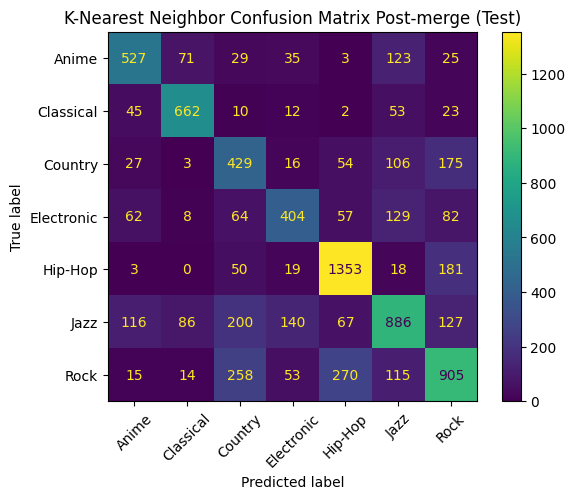

In [ ]:
y_test_post_pred = knn_post.predict(X_test_post_scaled)

print("\nTest Classification Report (Post-Merge):")
print(classification_report(y_test_post, y_test_post_pred, target_names=genre_encoder.classes_))

plt.figure(figsize=(10, 10))
cm_test_post = confusion_matrix(y_test_post, y_test_post_pred)
disp_test_post = ConfusionMatrixDisplay(confusion_matrix=cm_test_post, display_labels=genre_encoder.classes_)
disp_test_post.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Post-merge (Test)")
plt.show()

Baseline Accuracy: 0.6368
Weighted Precision: 0.6368
Macro Precision: 0.6314

Full Classification Report:
              precision    recall  f1-score   support

       Anime       0.66      0.65      0.66       813
   Classical       0.78      0.82      0.80       807
     Country       0.41      0.53      0.46       810
  Electronic       0.59      0.50      0.54       806
     Hip-Hop       0.75      0.83      0.79      1624
        Jazz       0.62      0.55      0.58      1622
        Rock       0.60      0.56      0.57      1630

    accuracy                           0.64      8112
   macro avg       0.63      0.63      0.63      8112
weighted avg       0.64      0.64      0.64      8112



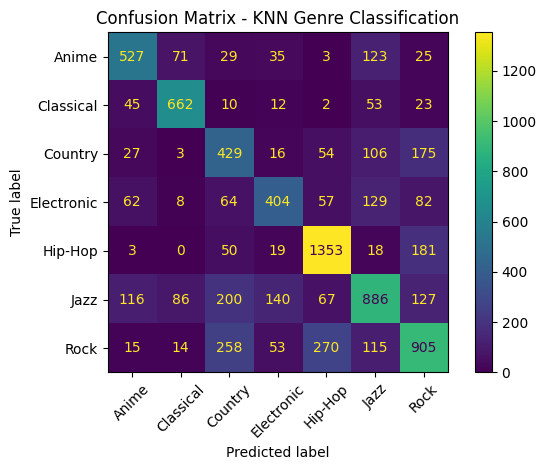

In [ ]:
#Train/validation/test Split (again, since we're working with a new dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Encode categorical columns: 'key', 'mode'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])

#Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

#Predict on the test set
y_pred = knn.predict(X_test_scaled)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Baseline Accuracy: {accuracy:.4f}")

#Classification Report (Precision - Weighted and Macro)
report = classification_report(y_test, y_pred, target_names=genre_encoder.classes_, output_dict=True)

#Print Weighted Precision
print(f"Weighted Precision: {report['accuracy']:.4f}")

#Macro Precision
macro_precision = precision_score(y_test, y_pred, average='macro', labels=np.unique(y_pred))
print(f"Macro Precision: {macro_precision:.4f}")

#Print out the full classification report
print("\nFull Classification Report:")
print(classification_report(y_test, y_pred, target_names=genre_encoder.classes_))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - KNN Genre Classification")
plt.tight_layout()
plt.show()


**Nearest Neighbors - With tuning**

Best number of neighbors (k): 20

Tuned Training Classification Report:
              precision    recall  f1-score   support

       Anime       0.74      0.67      0.70      3251
   Classical       0.82      0.84      0.83      3229
     Country       0.52      0.56      0.54      3239
  Electronic       0.71      0.52      0.60      3226
     Hip-Hop       0.79      0.85      0.82      6495
        Jazz       0.68      0.64      0.66      6488
        Rock       0.63      0.69      0.66      6520

    accuracy                           0.70     32448
   macro avg       0.70      0.68      0.69     32448
weighted avg       0.70      0.70      0.69     32448



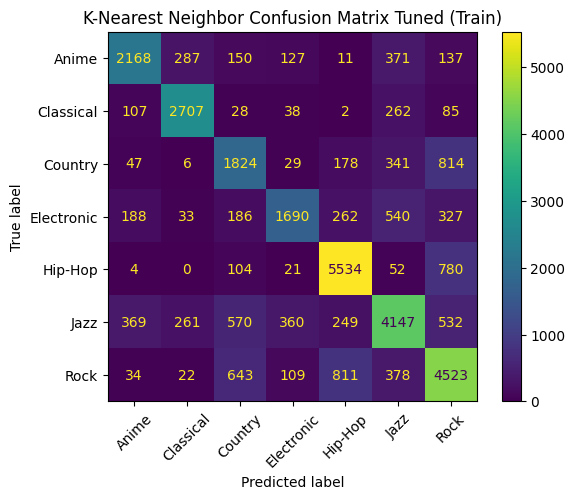

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, precision_score, accuracy_score
import matplotlib.pyplot as plt

#Hyperparameter tuning on post-merge training data
param_grid = {'n_neighbors': list(range(1, 21))}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_post_scaled, y_train_post)

best_k = grid_search.best_params_['n_neighbors']
print(f"Best number of neighbors (k): {best_k}")

#Training set evaluation
y_train_post_pred_tuned = grid_search.predict(X_train_post_scaled)
accuracy_train_tuned = accuracy_score(y_train_post, y_train_post_pred_tuned)
precision_train_tuned = precision_score(y_train_post, y_train_post_pred_tuned, average='weighted')
precision_train_tuned_macro = precision_score(y_train_post, y_train_post_pred_tuned, average='macro')

#Classification report
print("\nTuned Training Classification Report:")
print(classification_report(y_train_post, y_train_post_pred_tuned, target_names=genre_encoder.classes_))

#Confusion Matrix
cm_train_tuned = confusion_matrix(y_train_post, y_train_post_pred_tuned)
disp_train_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_train_tuned, display_labels=genre_encoder.classes_)
disp_train_tuned.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Tuned (Train)")
plt.show()



Tuned Test Classification Report:
              precision    recall  f1-score   support

       Anime       0.73      0.63      0.67       813
   Classical       0.80      0.82      0.81       807
     Country       0.47      0.52      0.50       810
  Electronic       0.66      0.47      0.55       806
     Hip-Hop       0.76      0.82      0.79      1624
        Jazz       0.65      0.60      0.62      1622
        Rock       0.58      0.66      0.62      1630

    accuracy                           0.66      8112
   macro avg       0.66      0.64      0.65      8112
weighted avg       0.66      0.66      0.66      8112



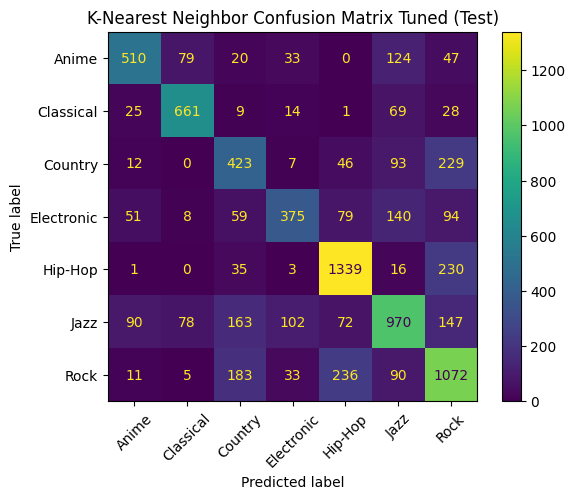

In [ ]:
#Test set evaluation
y_test_post_pred_tuned = grid_search.predict(X_test_post_scaled)
accuracy_test_tuned = accuracy_score(y_test_post, y_test_post_pred_tuned)
precision_test_tuned = precision_score(y_test_post, y_test_post_pred_tuned, average='weighted')
precision_test_tuned_macro = precision_score(y_test_post, y_test_post_pred_tuned, average='macro')

#Classification report
print("\nTuned Test Classification Report:")
print(classification_report(y_test_post, y_test_post_pred_tuned, target_names=genre_encoder.classes_))

#Confusion maxtrix for testing
cm_test_tuned = confusion_matrix(y_test_post, y_test_post_pred_tuned)
disp_test_tuned = ConfusionMatrixDisplay(confusion_matrix=cm_test_tuned, display_labels=genre_encoder.classes_)
disp_test_tuned.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Tuned (Test)")
plt.show()

**Nearest Neighbors - Feature Selection**

In [ ]:
#Dropping low importance features
low_importance_features = ['key', 'mode', 'liveness', 'tempo']
X_train_reduced = X_train.drop(columns=low_importance_features)
X_test_reduced = X_test.drop(columns=low_importance_features)

#Standardizing features that are critical for KNN
scaler = StandardScaler()
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

#Setting up KNN GridSearchCV
param_grid = {
    'n_neighbors': list(range(3, 21, 2)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_grid = GridSearchCV(KNeighborsClassifier(), param_grid = param_grid, cv=5, scoring='accuracy', verbose = 2)

#Running the grid search
knn_grid.fit(X_train_reduced_scaled, y_train)

best_knn = knn_grid.best_estimator_
best_knn.fit(X_train_reduced_scaled, y_train)

#Making predictions
y_train_pred = best_knn.predict(X_train_reduced_scaled)
y_test_pred = best_knn.predict(X_test_reduced_scaled)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.9s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.9s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   1.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   1.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.9s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.6s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   1.0s
[CV] END ...metric=euclidean, n_neighbors=5, we

Training set classification report (reduced features):
              precision    recall  f1-score   support

       Anime       0.77      0.74      0.76      3251
   Classical       0.85      0.86      0.85      3229
     Country       0.54      0.56      0.55      3239
  Electronic       0.73      0.55      0.63      3226
     Hip-Hop       0.80      0.86      0.83      6495
        Jazz       0.70      0.65      0.67      6488
        Rock       0.64      0.71      0.67      6520

    accuracy                           0.71     32448
   macro avg       0.72      0.70      0.71     32448
weighted avg       0.72      0.71      0.71     32448



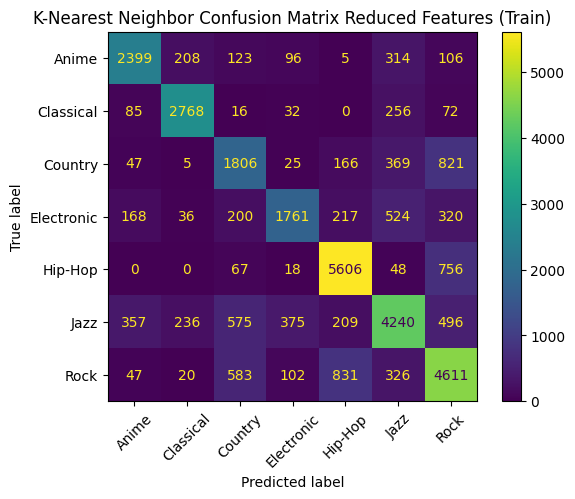

In [ ]:
#Training set evaluation
print("Training set classification report (reduced features):")
print(classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_))

#Confusion matrix
cm_train = confusion_matrix(y_train, y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=genre_encoder.classes_)
disp_train.plot(xticks_rotation=45)
plt.title("K-Nearest Neighbor Confusion Matrix Reduced Features (Train)")
plt.show()

SVM MODEL

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
import seaborn as sns

#Mounting drive to colab
from google.colab import drive
drive.mount('/content/drive')

#Reading data from file to variable named data
data = pd.read_csv('/content/drive/MyDrive/music_genre.csv')
from google.colab import drive
drive.mount('/content/drive')

#Displaying first few rows
data.head()

#Descriptive statistics for data
data.describe()

#Check data types/nulls
data.info()

#Print columns which have null data
print(data[data.isnull().all(axis=1)])

#Remove null data and check for results
data.dropna(how='all', inplace=True)
print(data.isnull().sum())

#Drop unnecessary columns
data1 = data.copy()
data1 = data1.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date' ])
print(data1.describe())

#Handle missing/invalid content
data1 = data1[data1['duration_ms'] > 0]
data1 = data1.dropna()

#Check which columns contain '?'
for col in data1.columns:
    if data1[col].astype(str).str.contains(r'\?').any():
        print(f"Column with '?': {col}")

data1.replace('?', pd.NA, inplace=True)
data1.dropna(inplace=True)

#Converting ms to seconds
data1['duration_ms'] = data1['duration_ms'] / 60000
#Seperate features and labels
X = data1.drop(columns=['music_genre'])
y = data1['music_genre']
feature_names = X.columns  #Saving column names here
#Encode genre before train-test split
genre_encoder = LabelEncoder()
data1['music_genre'] = genre_encoder.fit_transform(data1['music_genre'])

#Print data count in each genre
print(data1['music_genre'].value_counts())

#Print sum of genre counts:
print(data1['music_genre'].value_counts().sum())

#Print toal amount of data after removing bad data
print(data1.describe())

print(genre_encoder.classes_)

#Train/validation/test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#Encode categorical columns: 'key', 'mode'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])

print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Total samples:", len(X_train) + len(X_test))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness         

Accuracy:  0.6070636094674556
Precision:  0.6101141553506138
Classification report for train data: 
               precision    recall  f1-score   support

 Alternative       0.48      0.41      0.44      3241
       Anime       0.77      0.73      0.75      3251
       Blues       0.64      0.57      0.60      3237
   Classical       0.84      0.86      0.85      3229
     Country       0.55      0.58      0.57      3239
  Electronic       0.69      0.64      0.66      3225
     Hip-Hop       0.49      0.58      0.53      3262
        Jazz       0.61      0.55      0.58      3251
         Rap       0.50      0.40      0.45      3234
        Rock       0.53      0.73      0.62      3279

    accuracy                           0.61     32448
   macro avg       0.61      0.61      0.61     32448
weighted avg       0.61      0.61      0.61     32448



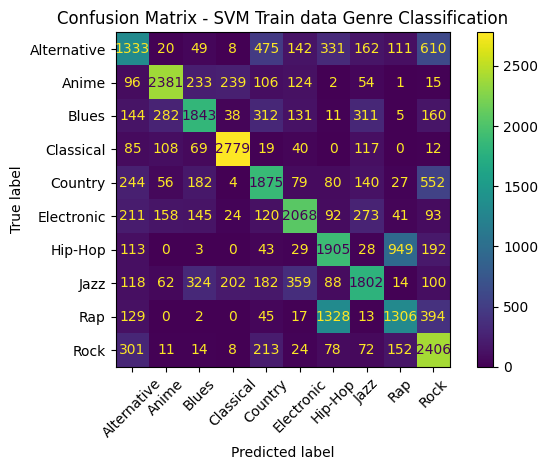

Accuracy:  0.5737179487179487
Precision:  0.5738960268103982
Classification report for test data: 
               precision    recall  f1-score   support

 Alternative       0.43      0.36      0.39       810
       Anime       0.77      0.71      0.74       813
       Blues       0.60      0.54      0.57       809
   Classical       0.81      0.86      0.84       807
     Country       0.54      0.56      0.55       810
  Electronic       0.62      0.60      0.61       807
     Hip-Hop       0.45      0.53      0.49       815
        Jazz       0.55      0.50      0.53       813
         Rap       0.45      0.36      0.40       808
        Rock       0.52      0.72      0.60       820

    accuracy                           0.57      8112
   macro avg       0.57      0.57      0.57      8112
weighted avg       0.57      0.57      0.57      8112



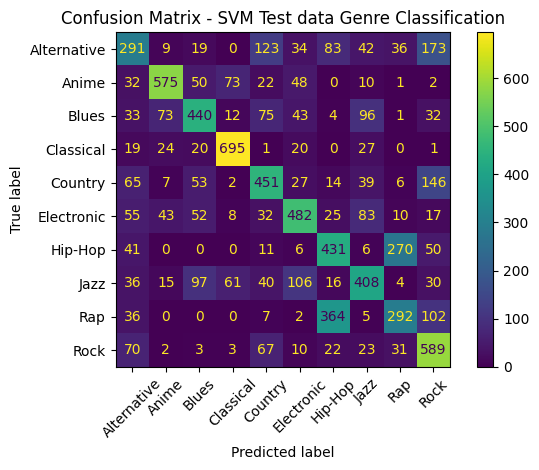

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and fitting SVM model
svm = SVC(kernel='rbf', C=1.0,gamma='scale')
svm.fit(X_train_scaled, y_train)

#Making predictions
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

print("Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Precision: ", precision_score(y_train, y_train_pred, average='weighted'))
print("Classification report for train data: \n", classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_))


#Confusion Matrix
cm = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Train data Genre Classification")
plt.tight_layout()
plt.show()

#Evaluating the testing model
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision: ", precision_score(y_test, y_test_pred, average='weighted'))
print("Classification report for test data: \n", classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_))


#Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Test data Genre Classification")
plt.tight_layout()
plt.show()

Train Accuracy:  0.6070636094674556
Test Accuracy:  0.5738960268103982

Train Set Classification report:                precision    recall  f1-score   support

 Alternative       0.48      0.41      0.44      3241
       Anime       0.77      0.73      0.75      3251
       Blues       0.64      0.57      0.60      3237
   Classical       0.84      0.86      0.85      3229
     Country       0.55      0.58      0.57      3239
  Electronic       0.69      0.64      0.66      3225
     Hip-Hop       0.49      0.58      0.53      3262
        Jazz       0.61      0.55      0.58      3251
         Rap       0.50      0.40      0.45      3234
        Rock       0.53      0.73      0.62      3279

    accuracy                           0.61     32448
   macro avg       0.61      0.61      0.61     32448
weighted avg       0.61      0.61      0.61     32448


Test Set Classification report:                precision    recall  f1-score   support

 Alternative       0.43      0.36      0.39   

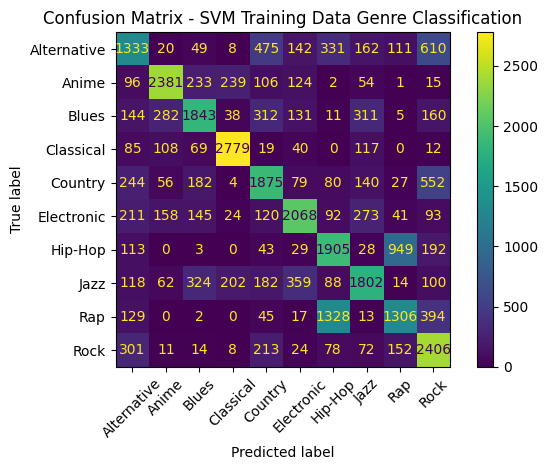

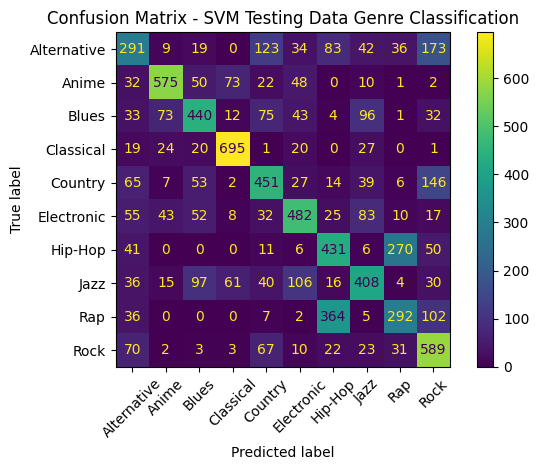

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Creating and fitting SVMS model
svm = SVC(kernel='rbf',C=1.0,gamma='scale')
svm.fit(X_train_scaled, y_train)

#Making predictions
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

#Evaluating the model
print("Train Accuracy: ", accuracy_score(y_train, y_train_pred))
print("Test Accuracy: ", precision_score(y_test, y_test_pred,average='weighted'))
print("\nTrain Set Classification report: ", classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_,zero_division=0))
print("\nTest Set Classification report: ", classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_,zero_division=0))


#Precision
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
precision_macro = precision_score(y_test, y_test_pred, average='macro')

print(f"Weighted Precision: {precision_weighted:.4f}")
print(f"Macro Precision: {precision_macro:.4f}")

#Confusion Matrix on training data
cm_train = confusion_matrix(y_train,y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=genre_encoder.classes_)
disp_train.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Training Data Genre Classification")
plt.tight_layout()
plt.show()

#Confusion Matrix on testing data
cm_test = confusion_matrix(y_test,y_test_pred)
disp_test= ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=genre_encoder.classes_)
disp_test.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Testing Data Genre Classification")
plt.tight_layout()
plt.show()

In [ ]:
#Copying the dataset
data2 = data1.copy()

#Inversing old encoding
data2['music_genre'] = genre_encoder.inverse_transform(data2['music_genre'])

#Merging genres for better accuracy
data2['music_genre'] = data2['music_genre'].replace({
    'Rap': 'Hip-Hop',
    'Alternative': 'Rock',
    'Blues': 'Jazz',
})

#Re-encoding genres to ensure labels are sequential
genre_encoder = LabelEncoder()
data2['music_genre'] = genre_encoder.fit_transform(data2['music_genre'])

X = data2.drop(columns=['music_genre'])
y = data2['music_genre']

print(data2['music_genre'].value_counts())
#Ensuring amount stayed the same of total
print(data2['music_genre'].value_counts().sum())
print(genre_encoder.classes_)

music_genre
6    8150
4    8119
5    8110
0    4064
2    4049
1    4036
3    4032
Name: count, dtype: int64
40560
['Anime' 'Classical' 'Country' 'Electronic' 'Hip-Hop' 'Jazz' 'Rock']


Train Accuracy: 0.7266
Test Accuracy: 0.7129
Test Weighted Precision: 0.7149
Test Macro Precision: 0.7226

Train Set Classification report: 
               precision    recall  f1-score   support

       Anime       0.79      0.72      0.75      3251
   Classical       0.86      0.85      0.85      3229
     Country       0.63      0.44      0.52      3239
  Electronic       0.72      0.59      0.65      3226
     Hip-Hop       0.83      0.87      0.85      6495
        Jazz       0.69      0.71      0.70      6488
        Rock       0.62      0.75      0.68      6520

    accuracy                           0.73     32448
   macro avg       0.73      0.70      0.71     32448
weighted avg       0.73      0.73      0.72     32448


Test Set Classification report: 
               precision    recall  f1-score   support

       Anime       0.79      0.71      0.75       813
   Classical       0.84      0.83      0.83       807
     Country       0.65      0.46      0.53       810
  Electro

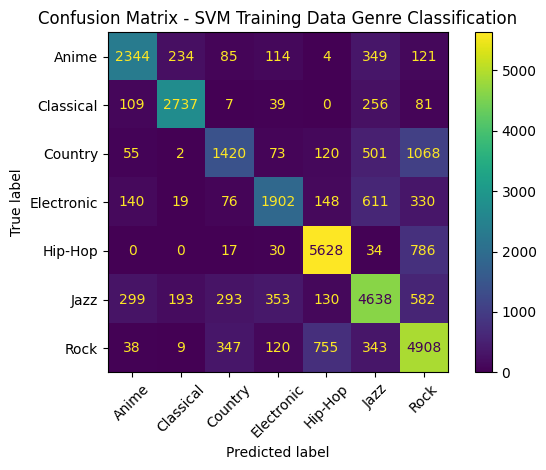

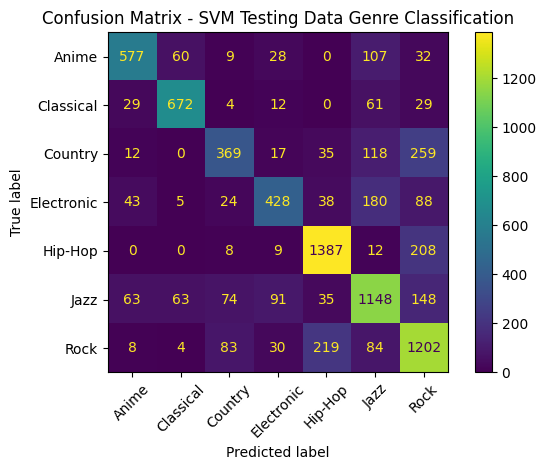

In [ ]:
#Train/validation/test Split (again, since we're working with a new dataset)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Encode categorical columns: 'key', 'mode'
col_encoder = LabelEncoder()
for col in ['key', 'mode']:
    X_train[col] = col_encoder.fit_transform(X_train[col])
    X_test[col] = col_encoder.transform(X_test[col])

#Standardize features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Create and fit the SVM model
svm =SVC(kernel='rbf', C=1.0,gamma='scale')
svm.fit(X_train_scaled, y_train)

#Predict on the training & testing
y_train_pred = svm.predict(X_train_scaled)
y_test_pred = svm.predict(X_test_scaled)

#Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)

#print("\nTrain Set Classification report: \n", classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_,zero_division=0))
print(f"Train Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

# precision for test data
precision_weighted = precision_score(y_test, y_test_pred, average='weighted')
precision_macro = precision_score(y_test, y_test_pred, average='macro')

print(f"Test Weighted Precision: {precision_weighted:.4f}")
print(f"Test Macro Precision: {precision_macro:.4f}")

#Print out the full classification report
print("\nTrain Set Classification report: \n", classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_,zero_division=0))
print("\nTest Set Classification report: \n", classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_,zero_division=0))

#Confusion matrix on trianing data
cm_train = confusion_matrix(y_train,y_train_pred)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=genre_encoder.classes_)
disp_train.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Training Data Genre Classification")
plt.tight_layout()
plt.show()

#Confusion matrix on testing data
cm_test = confusion_matrix(y_test,y_test_pred)
disp_test= ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=genre_encoder.classes_)
disp_test.plot(xticks_rotation=45)
plt.title("Confusion Matrix - SVM Testing Data Genre Classification")
plt.tight_layout()
plt.show()

#Classification Report (Precision - Weighted and Macro)
# report = classification_report(y_test, y_pred, target_names=genre_encoder.classes_, output_dict=True)


Best SVM parameters: {'kernel': 'rbf', 'gamma': 'auto', 'C': 1}
Tuned Test Accuracy: 0.7129
Tuned Test Data Weighted Precision: 0.7149
Tuned Test Data Precision: 0.7226

Train Classification Report:
              precision    recall  f1-score   support

       Anime       0.79      0.71      0.75       813
   Classical       0.84      0.83      0.83       807
     Country       0.65      0.46      0.53       810
  Electronic       0.70      0.53      0.60       806
     Hip-Hop       0.81      0.85      0.83      1624
        Jazz       0.67      0.71      0.69      1622
        Rock       0.61      0.74      0.67      1630

    accuracy                           0.71      8112
   macro avg       0.72      0.69      0.70      8112
weighted avg       0.71      0.71      0.71      8112

Tuned Train Accuracy: 0.7266
Tuned Train Data Weighted Precision: 0.7280
Tuned Train Data Precision: 0.7342

Train Classification Report:
              precision    recall  f1-score   support

       Anim

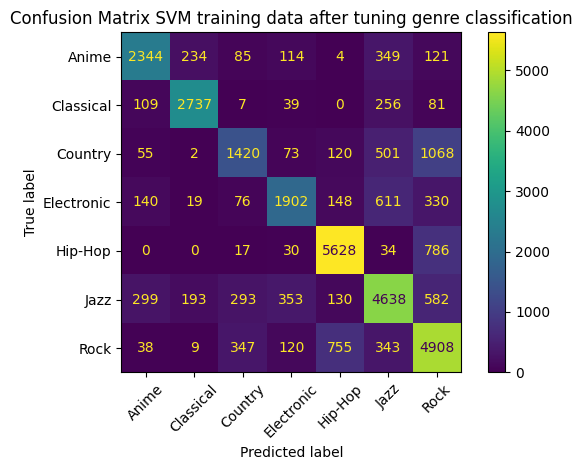

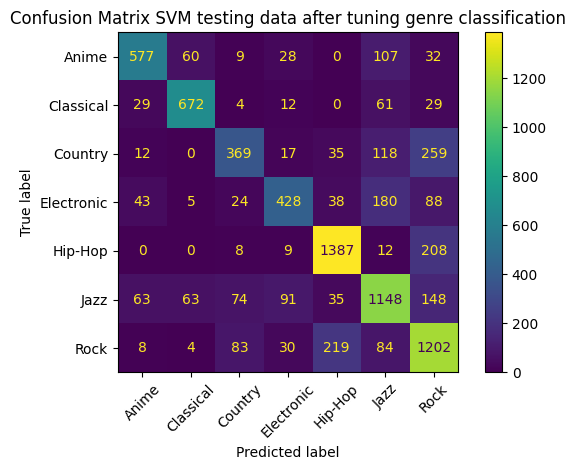

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, classification_report, confusion_matrix,ConfusionMatrixDisplay



# Define parameter grid for randomized Search
param_grid = {'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.1],
    'kernel': ['rbf', 'linear']
}

# Grid search using cross-validation
#grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
#grid_search.fit(X_train_scaled, y_train)

# random search for a fixed # of combinations
random_search = RandomizedSearchCV(SVC(), param_distributions=param_grid, n_iter=5, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Retrieve the best model
best_svm=random_search.best_estimator_
print(f"Best SVM parameters: {random_search.best_params_}")

# Use the best estimator found
#best_svm = grid_search.best_estimator_

# Predict on test & train set using the tuned model
y_train_pred = best_svm.predict(X_train_scaled)
y_test_pred = best_svm.predict(X_test_scaled)

# Calculate test accuracy
accuracy_tuned = accuracy_score(y_test, y_test_pred)
print(f"Tuned Test Accuracy: {accuracy_tuned:.4f}")
# Train accuacy: print(f"Train Accuracy:
# Calculate precision
precision_weighted = precision_score(y_test, y_test_pred, average='weighted',zero_division=0)
precision_macro = precision_score(y_test, y_test_pred, average='macro',zero_division=0)

print(f"Tuned Test Data Weighted Precision: {precision_weighted:.4f}")
print(f"Tuned Test Data Precision: {precision_macro:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_,zero_division=0))

# Calculate train accuracy
accuracy_train_tuned = accuracy_score(y_train, y_train_pred)
print(f"Tuned Train Accuracy: {accuracy_train_tuned:.4f}")
# Train accuacy: print(f"Train Accuracy:
# Calculate precision
precision_weighted_train = precision_score(y_train, y_train_pred, average='weighted',zero_division=0)
precision_macro_train = precision_score(y_train, y_train_pred, average='macro',zero_division=0)



print(f"Tuned Train Data Weighted Precision: {precision_weighted_train:.4f}")
print(f"Tuned Train Data Precision: {precision_macro_train:.4f}")
print("\nTrain Classification Report:")
print(classification_report(y_train, y_train_pred, target_names=genre_encoder.classes_,zero_division=0))

#Print out the full classification report
#print("\nTest Classification Report:")
#print(classification_report(y_test, y_test_pred, target_names=genre_encoder.classes_,zero_division=0))

# Optional: Confusion Matrix for training data
# y_train_pred = best_svm.predict(X_train_scaled)
cm_train = confusion_matrix(y_train, y_train_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title(f"Confusion Matrix SVM training data after tuning genre classification")
plt.tight_layout()
plt.show()

# Optional: Confusion Matrix for testingdata
# y_test_pred = best_svm.predict(X_test_scaled)
cm_test = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=genre_encoder.classes_)
disp.plot(xticks_rotation=45)
plt.title(f"Confusion Matrix SVM testing data after tuning genre classification")
plt.tight_layout()
plt.show()

Merged genre classes: ['Anime' 'Classical' 'Country' 'Electronic' 'Hip-Hop' 'Jazz' 'Rock']

Top 10 features: ['tempo', 'duration_ms', 'valence', 'speechiness', 'instrumentalness', 'energy', 'danceability', 'acousticness', 'loudness', 'popularity']


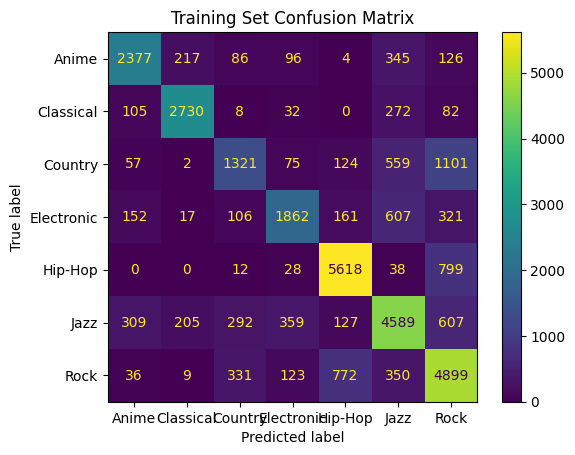


Training Set Classification Report:
              precision    recall  f1-score   support

       Anime       0.78      0.73      0.76      3251
   Classical       0.86      0.85      0.85      3229
     Country       0.61      0.41      0.49      3239
  Electronic       0.72      0.58      0.64      3226
     Hip-Hop       0.83      0.86      0.84      6495
        Jazz       0.68      0.71      0.69      6488
        Rock       0.62      0.75      0.68      6520

    accuracy                           0.72     32448
   macro avg       0.73      0.70      0.71     32448
weighted avg       0.72      0.72      0.72     32448



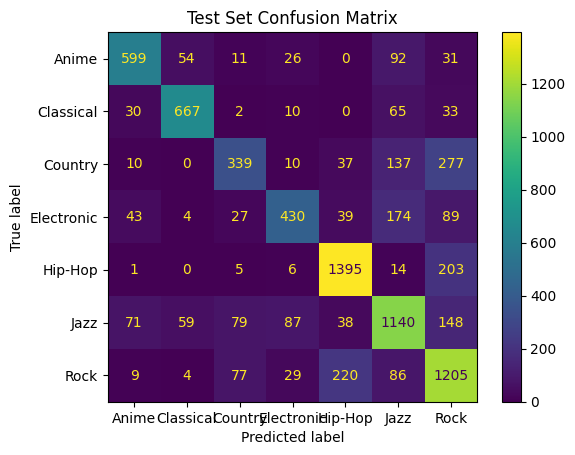


Test Set Classification Report:
              precision    recall  f1-score   support

       Anime       0.79      0.74      0.76       813
   Classical       0.85      0.83      0.84       807
     Country       0.63      0.42      0.50       810
  Electronic       0.72      0.53      0.61       806
     Hip-Hop       0.81      0.86      0.83      1624
        Jazz       0.67      0.70      0.68      1622
        Rock       0.61      0.74      0.67      1630

    accuracy                           0.71      8112
   macro avg       0.72      0.69      0.70      8112
weighted avg       0.71      0.71      0.71      8112



In [ ]:
#feature selection
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_classif

#Reloading and preprocessing data
data = pd.read_csv('/content/drive/MyDrive/music_genre.csv')

#Cleaning data
data = data.dropna(how='all')
data = data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'])
data = data[data['duration_ms'] > 0]
data = data[~data.isin(['?']).any(axis=1)]
data['duration_ms'] = data['duration_ms'] / 60000  # Convert to minutes

#Merging genres
data['music_genre'] = data['music_genre'].replace({
    'Rap': 'Hip-Hop',
    'Alternative': 'Rock',
    'Blues': 'Jazz'
})

#Encoding merged genres
genre_encoder = LabelEncoder()
data['music_genre'] = genre_encoder.fit_transform(data['music_genre'])
print("Merged genre classes:", genre_encoder.classes_)

#Splitting features and target
X = data.drop(columns=['music_genre'])
y = data['music_genre']

# plitting data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Encoding categorical features
cat_cols = ['key', 'mode']
encoder = OrdinalEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

#Feature selection using ANOVA F-test
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_train, y_train)

#Getting top 10 most important features
top_features_idx = np.argsort(selector.scores_)[-10:]
top_features = X.columns[top_features_idx]
print("\nTop 10 features:", list(top_features))

X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

#Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

#Training SVM (replacing KNN)
svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm.fit(X_train_scaled, y_train)

#Evaluation
def evaluate_model(model, X, y, encoder, title):
    y_pred = model.predict(X)

    #Confusion Matrix
    cm = confusion_matrix(y, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=encoder.classes_)
    disp.plot()
    plt.title(f'{title} Confusion Matrix')
    plt.show()

    #Classification Report
    print(f"\n{title} Classification Report:")
    print(classification_report(y, y_pred, target_names=encoder.classes_))

#Evaluate on both sets
evaluate_model(svm, X_train_scaled, y_train, genre_encoder, "Training Set")
evaluate_model(svm, X_test_scaled, y_test, genre_encoder, "Test Set")

**Model Comparison**

In [ ]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Loading and preprocessing data just like before
data = pd.read_csv('/content/drive/MyDrive/music_genre.csv')
data = data.dropna(how='all')
data = data.drop(columns=['instance_id', 'artist_name', 'track_name', 'obtained_date'])
data = data[data['duration_ms'] > 0]
data = data[~data.isin(['?']).any(axis=1)]
data['duration_ms'] = data['duration_ms'] / 60000

#Merging genres
data['music_genre'] = data['music_genre'].replace({
    'Rap': 'Hip-Hop', 'Alternative': 'Rock', 'Blues': 'Jazz'
})

#Encoding targets
genre_encoder = LabelEncoder()
data['music_genre'] = genre_encoder.fit_transform(data['music_genre'])

#Splitting targets and features
X = data.drop(columns=['music_genre'])
y = data['music_genre']

#Splitting data into train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

#Encoding categorical data
cat_cols = ['key', 'mode']
encoder = OrdinalEncoder()
X_train[cat_cols] = encoder.fit_transform(X_train[cat_cols])
X_test[cat_cols] = encoder.transform(X_test[cat_cols])

#Common feature selection
selector = SelectKBest(score_func=f_classif, k=10)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

#Standardizing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Setting up all three models
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

#Setting up results for comparison
results = {
    'Model': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'Training Time (s)': [],
    'Prediction Time (s)': [],
    'Avg F1-Score': []
}

#For confusion matrix visualization
confusion_matrices = {}


for name, model in models.items():
    #Training data
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time

    #Setting predictions
    start_time = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start_time

    #Evaluatiing metrics
    train_acc = accuracy_score(y_train, model.predict(X_train))
    test_acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    avg_f1 = report['macro avg']['f1-score']

    #Storing results for comparison model
    results['Model'].append(name)
    results['Train Accuracy'].append(train_acc)
    results['Test Accuracy'].append(test_acc)
    results['Training Time (s)'].append(train_time)
    results['Prediction Time (s)'].append(pred_time)
    results['Avg F1-Score'].append(avg_f1)

    #Storing confusion matrix
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

#Converting to DataFrame
results_df = pd.DataFrame(results)

In [ ]:
#Setting common style
sns.set_palette("husl")

#1. Accuracy Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=results_df)
plt.title("Test Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

#2. Runtime Comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Training Time (s)', data=results_df)
plt.title("Training Time Comparison")
plt.show()

#3. Confusion Matrices
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
for idx, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', ax=axes[idx],
                xticklabels=genre_encoder.classes_,
                yticklabels=genre_encoder.classes_)
    axes[idx].set_title(f"{name} Confusion Matrix")
plt.tight_layout()
plt.show()

In [ ]:
print("\n=== Comparative Analysis Summary ===")
print(results_df.to_markdown(index=False))

print("\nKey Observations:")
print("1. Accuracy:")
print(f"   - Best Test Accuracy: {results_df['Test Accuracy'].max():.2f} by {results_df.loc[results_df['Test Accuracy'].idxmax(), 'Model']}")
print(f"   - Most Overfit: {results_df['Train Accuracy'].max() - results_df['Test Accuracy'].max():.2f} difference (KNN)")

print("\n2. Speed:")
print(f"   - Fastest Training: {results_df['Training Time (s)'].min():.2f}s (Random Forest)")
print(f"   - Fastest Prediction: {results_df['Prediction Time (s)'].min():.2f}s (Random Forest)")

print("\n3. F1-Score:")
print(f"   - Best Balanced Performance: {results_df['Avg F1-Score'].max():.2f} (SVM)")